In [6]:
'''
This section add a attribute "sentiment" to the scraped tweet
This attribute can either be "POSITIVE" or "NEGATIVE"
'''

from flair.models import TextClassifier
from flair.data import Sentence
import pickle

# Load the pre-trained sentiment classifier
classifier = TextClassifier.load('en-sentiment')

def get_sentiment(sentence):
    sentence = Sentence(sentence)
    classifier.predict(sentence)
    return sentence.labels[0].value

file_location = 'D:\\5005-Data\\tweet_combined_with_sentiment.pkl'
with open(file_location, 'rb') as f:
    tweets_dict = pickle.load(f)

for i, k in enumerate(tweets_dict):
    tweets_dict[k].sentiment = get_sentiment(tweets_dict[k].rawContent)
    if (i + 1) % 500 == 0:
        print(f'{i + 1} records processed')

with open(file_location, 'wb') as f:
    print('Saving...')
    pickle.dump(tweets_dict, f)

1387322
500 records processed
1000 records processed
1500 records processed
2000 records processed
2500 records processed
3000 records processed
3500 records processed
4000 records processed
4500 records processed
5000 records processed
5500 records processed
6000 records processed
6500 records processed
7000 records processed
7500 records processed
8000 records processed
8500 records processed
9000 records processed
9500 records processed
10000 records processed
10500 records processed
11000 records processed
11500 records processed
12000 records processed
12500 records processed
13000 records processed
13500 records processed
14000 records processed
14500 records processed
15000 records processed
15500 records processed
16000 records processed
16500 records processed
17000 records processed
17500 records processed
18000 records processed
18500 records processed
19000 records processed
19500 records processed
20000 records processed
20500 records processed
21000 records processed
2150

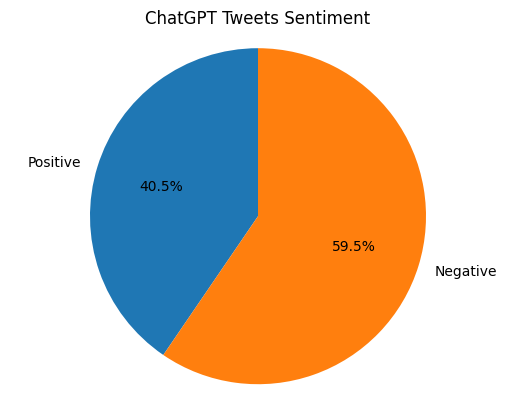

In [23]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
size = [0, 0]
for k in tweets_dict:
    if tweets_dict[k].sentiment == 'POSITIVE':
        size[0] += 1
    else:
        size[1] += 1

fig, ax = plt.subplots()
ax.pie(size, labels=labels, startangle=90, autopct='%1.1f%%')
ax.axis('equal')

plt.title('ChatGPT Tweets Sentiment')
plt.show()

[66, 113]


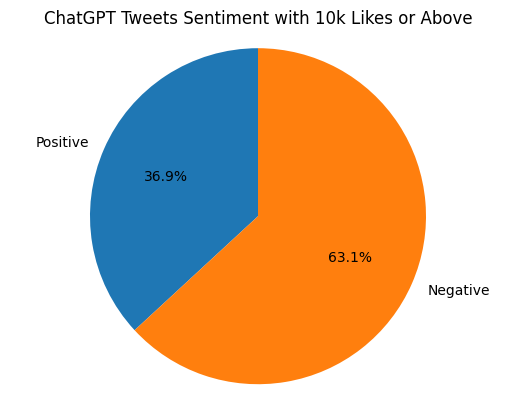

In [22]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative']
size = [0, 0]
for k in tweets_dict:
    if tweets_dict[k].likeCount < 10000:
        continue
    if tweets_dict[k].sentiment == 'POSITIVE':
        size[0] += 1
    else:
        size[1] += 1

print(size)

fig, ax = plt.subplots()
ax.pie(size, labels=labels, startangle=90, autopct='%1.1f%%')
ax.axis('equal')

plt.title('ChatGPT Tweets Sentiment with 10k Likes or Above')
plt.show()

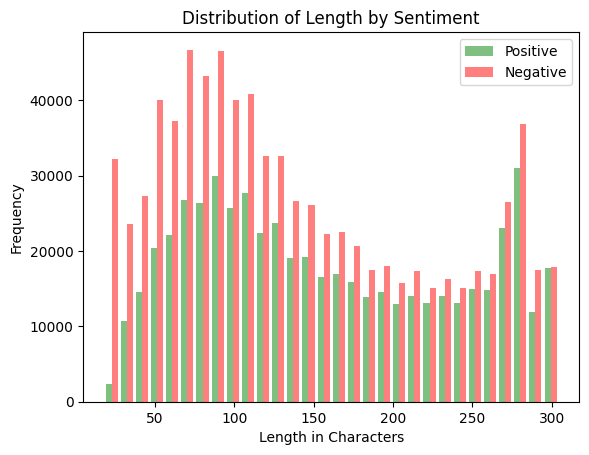

<Figure size 1300x500 with 0 Axes>

In [51]:
# Plot histogram to investigate if there are any correlation between tweet length and sentiment

def remove_extreme_values(lst):
    # Sort the list in ascending order
    sorted_lst = sorted(lst)
    
    # Calculate the number of values to remove from each end
    num_to_remove = int(len(lst) * 0.01)
    
    # Remove the extreme values
    trimmed_lst = sorted_lst[num_to_remove:-num_to_remove]
    
    return trimmed_lst

import matplotlib.pyplot as plt

positive_lengths = []
negative_lengths = []

for k in tweets_dict:
    tweet = tweets_dict[k]
    if tweet.sentiment == 'POSITIVE':
        positive_lengths.append(len(tweet.rawContent))
    else:
        negative_lengths.append(len(tweet.rawContent))

positive_lengths = remove_extreme_values(positive_lengths)
negative_lengths = remove_extreme_values(negative_lengths)

plt.hist([positive_lengths, negative_lengths], bins=30, alpha=0.5, color=['green', 'red'])

plt.xlabel('Length in Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Length by Sentiment')

plt.legend(['Positive', 'Negative'])
plt.show()

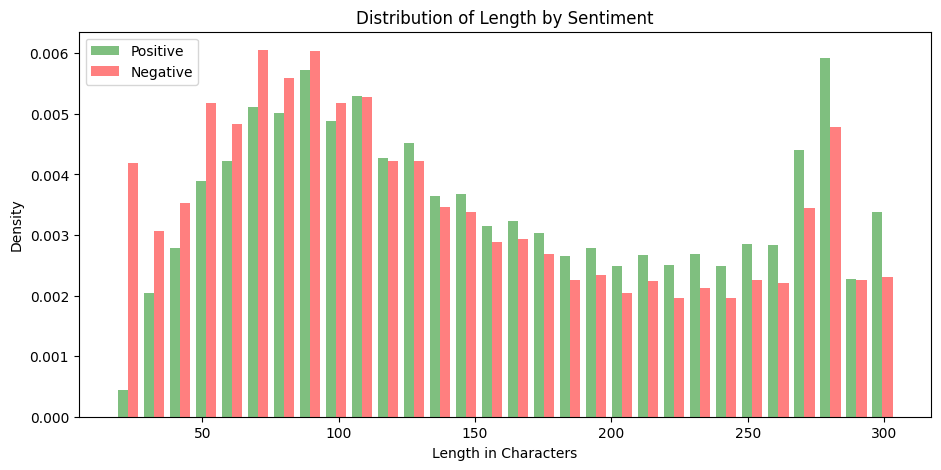

In [56]:
# Plot density histogram (normalized by total number of same label) to investigate if there are any correlation between tweet length and sentiment
import matplotlib.pyplot as plt

positive_lengths = []
negative_lengths = []

for k in tweets_dict:
    tweet = tweets_dict[k]
    if tweet.sentiment == 'POSITIVE':
        positive_lengths.append(len(tweet.rawContent))
    else:
        negative_lengths.append(len(tweet.rawContent))

positive_lengths = remove_extreme_values(positive_lengths)
negative_lengths = remove_extreme_values(negative_lengths)

plt.hist([positive_lengths, negative_lengths], bins=30, alpha=0.5, density=True ,color=['green', 'red'])

fig = plt.gcf()
fig.set_size_inches(11, 5)

plt.xlabel('Length in Characters')
plt.ylabel('Density')
plt.title('Distribution of Length by Sentiment')

plt.legend(['Positive', 'Negative'])
plt.show()

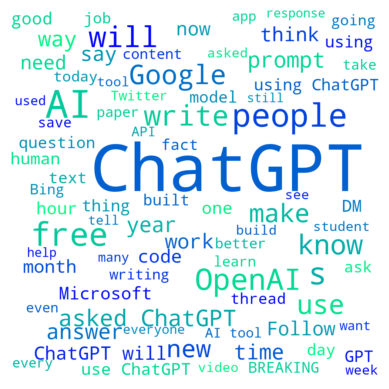

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

def remove_urls_and_entities(text):
    """
    Removes URLs and HTML entities from a string using regular expressions.
    
    Args:
        text (str): The input string to remove URLs and HTML entities from.
        
    Returns:
        str: The input string with any URLs and HTML entities removed.
    """
    # Define regular expressions to match URLs and HTML entities
    url_pattern = re.compile(r'https?://(?:www\.\S+|(?!www)\S+)')
    entity_pattern = re.compile(r'&\w+;')
    
    # Use the sub() method to replace URLs and HTML entities with an empty string
    text_without_urls_and_entities = url_pattern.sub('', text)
    text_without_urls_and_entities = entity_pattern.sub('', text_without_urls_and_entities)
    
    return text_without_urls_and_entities

positive_text = ''
negative_text = ''

for k in tweets_dict:
    tweet = tweets_dict[k]
    if tweet.likeCount < 1000:
        continue
    if tweet.sentiment == 'POSITIVE':
        positive_text += remove_urls_and_entities(tweet.rawContent)
    else:
        negative_text += remove_urls_and_entities(tweet.rawContent)

# Create a WordCloud object
wordcloud = WordCloud(width=1000, height=1000, background_color='white', max_words=80, contour_width=3, prefer_horizontal=1, colormap='winter')
wordcloud.generate(negative_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()